### examine distribution of columns 

In [4]:
import sys
import os
import glob
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%precision 4

'%.4f'

In [5]:
root_dir = os.getcwd()
data_dir = os.path.join(root_dir, 'data')
output_dir = os.path.join(root_dir, 'output')
images_dir = os.path.join(root_dir, 'images')

In [6]:
from os.path import join

train_user = pd.read_csv(join(data_dir, 'train_users.csv'), header=0)
test_user  = pd.read_csv(join(data_dir, 'test_users.csv'), header=0)
session_df = pd.read_csv(join(data_dir, 'sessions.csv'), header=0)

In [9]:
train_user.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,ccu7c3q7h3,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,0xqosmub05,2011-05-25,20090523174809,NaN,MALE,38,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,syiid9h31c,2010-09-28,20090609231247,2010-08-02,FEMALE,56,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,4uid7lk4z3,2011-12-05,20091031060129,2012-09-08,FEMALE,42,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,bibf93h56j,2010-09-14,20091208061105,2010-02-18,-unknown-,40,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [8]:
train_user.columns
# string: ['id', 'signup_method', 'signup_flow']
# categorical: ['gender', 'signup_method', 'signup_flow', 'signup_flow', 'language', 'affiliate_channel', \
#               'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', \
#               'first_browser', 'country_destination']
# date: ['date_account_created', 'timestamp_first_active', 'date_first_booking']

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')

In [62]:
def pieChart(x_series, plot_title=""):
    """plot pie chart for frequency"""
    
    import pylab
    
    tot = len(x_series)
    value_count = x_series.value_counts()
    vals = list(value_count.index)
    counts = list(value_count.values)
    ptgs = [cnt/tot for cnt in counts]
    
    pylab.figure(1, figsize=(6,6))
    pylab.ax = axes([0.1, 0.1, 0.8, 0.8])
    pylab.pie(ptgs, labels=vals, autopct='%1.1f%%', shadow=True, startangle=90)
    if plot_title != "":
        pylab.title(plot_title)
    pylab.show()
    
    return None

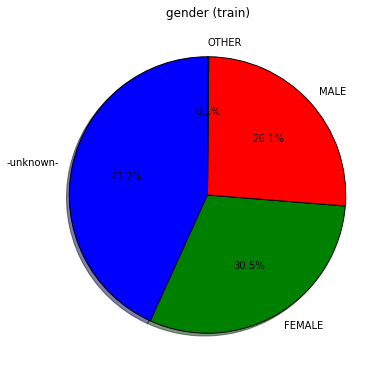

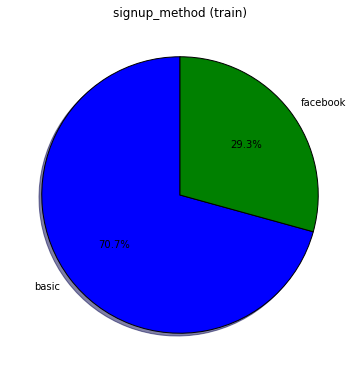

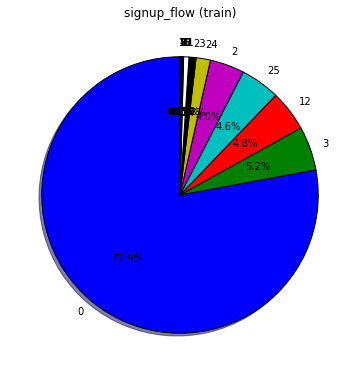

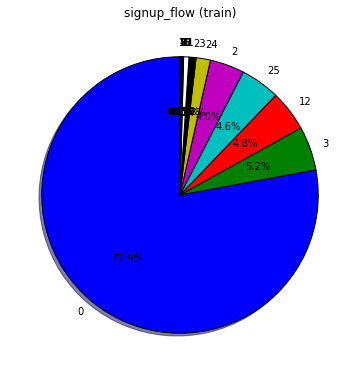

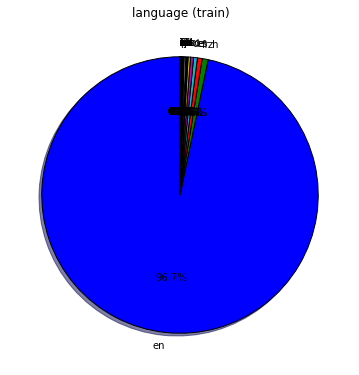

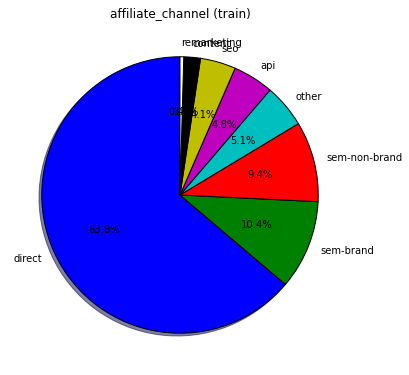

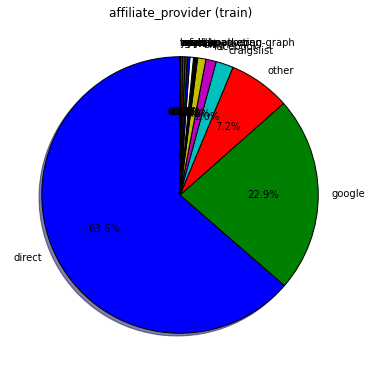

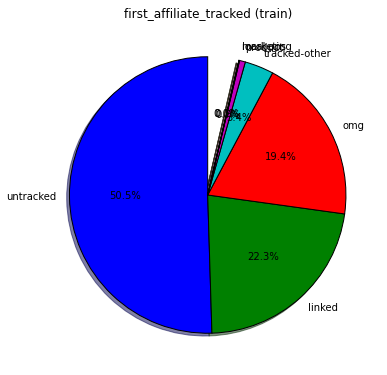

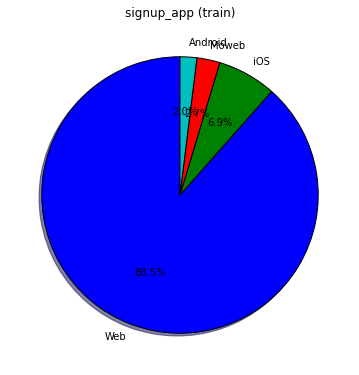

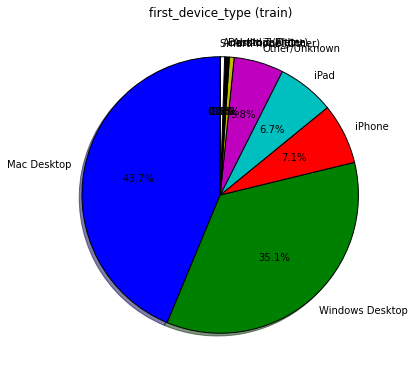

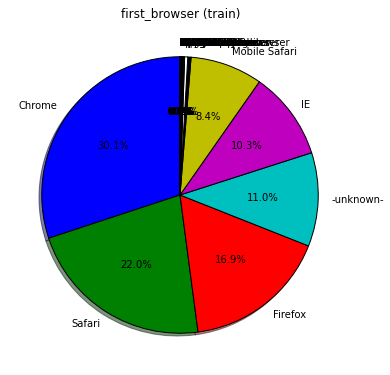

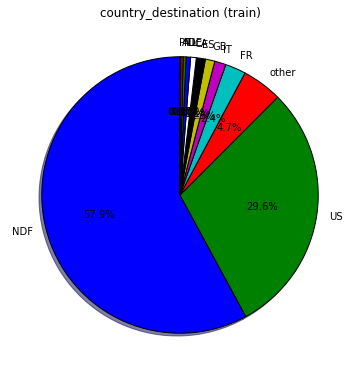

In [61]:
categorical_feats = ['gender', 'signup_method', 'signup_flow', 'signup_flow', 'language', 'affiliate_channel', \
               'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', \
               'first_browser', 'country_destination']
# pd.Series(categorical_feats).isin(train_user.columns)

# print unqiue value per categorical value
for feat in categorical_feats:
    #uniq_vals = train_user[feat].unique()
    #print("* {}:".format(feat))
    #print("{}\n".format(uniq_vals))
    title_txt = feat + " (train)"
    pieChart(train_user[feat], title_txt)

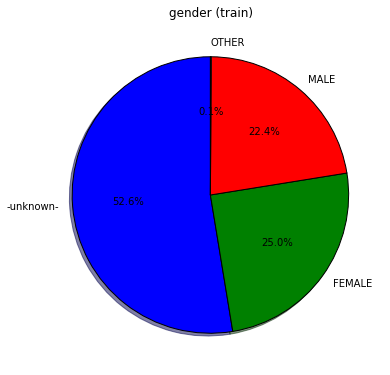

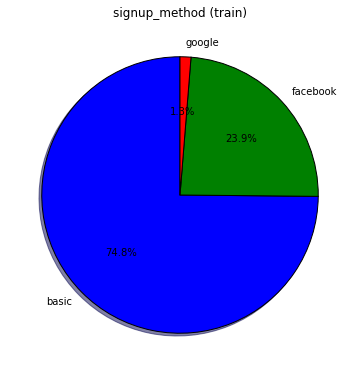

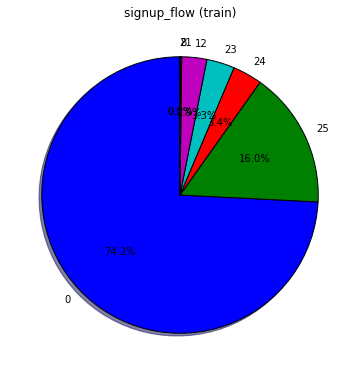

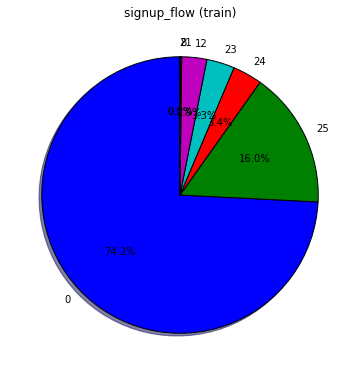

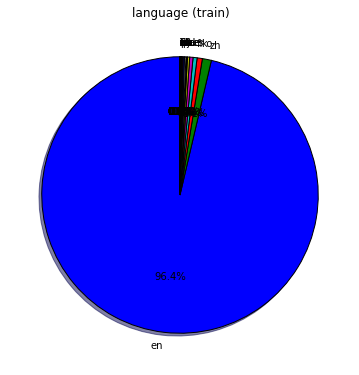

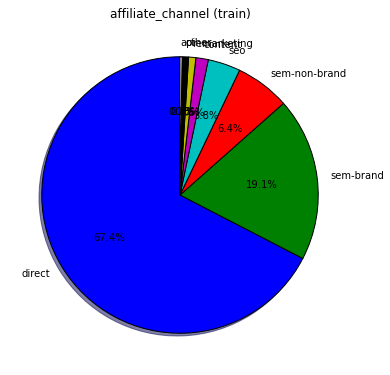

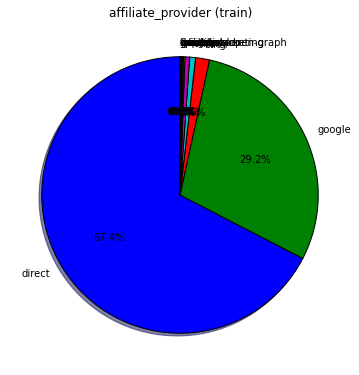

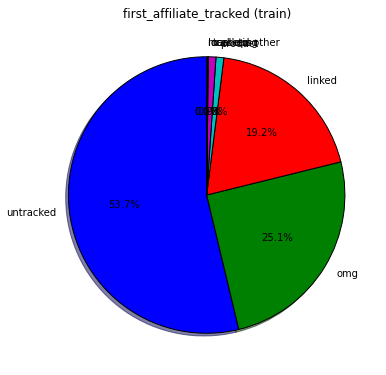

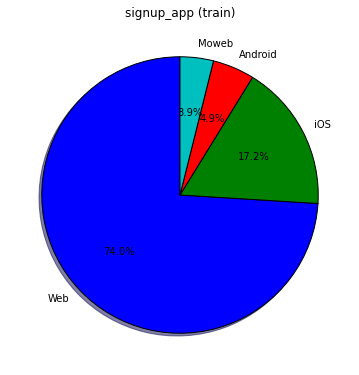

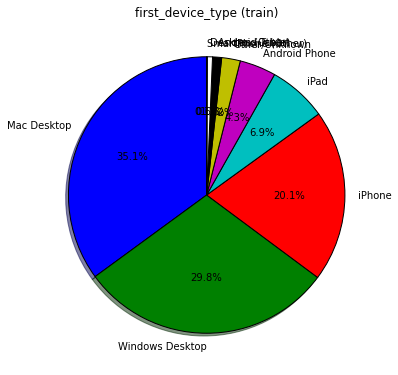

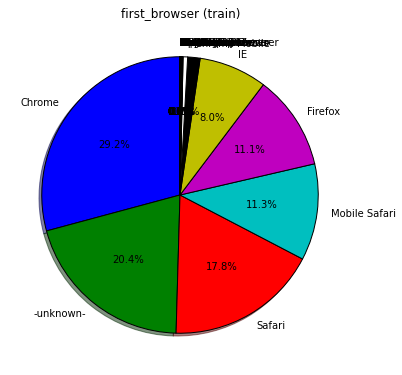

In [64]:
for feat in categorical_feats:
    if feat in test_user.columns:
        title_txt = feat + " (test)"
        pieChart(test_user[feat], title_txt)